# Hipothesis Tests

In this notebook we will review some traditional but necessary hypothesis tests.

- The Chi-Square test is a statistical method to determine if two **categorical variables** have a significant correlation.

- A one-sample test determines whether or not a sample statistic is statistically different from a population value.

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 10)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid") 

import scipy.stats as st
from statsmodels.stats import proportion as sprop
from statsmodels.stats import weightstats as stests

## Chi-Squared Goodness-Of-Fit Test

The chi-squared goodness-of-fit method tests whether the distribution of sample categorical data matches an expected distribution.

Let us generate some fake demographic data for U.S. and town_X and walk through the chi-square goodness of fit test to determine whether they are different.

In [2]:
# Generating a fictitious population's race.
national_race = pd.DataFrame({'race':["white"]*100000 + ["hispanic"]*60000 + ["black"]*50000 + ["asian"]*10000})
print(national_race.shape)
national_race.groupby('race').size()

(220000, 1)


race
asian        10000
black        50000
hispanic     60000
white       100000
dtype: int64

In [3]:
# Calculating the relative frequencies
national_race.groupby('race').size() / len(national_race)

race
asian       0.045455
black       0.227273
hispanic    0.272727
white       0.454545
dtype: float64

Notice that the difference between the two graphs is the y-axis scale.

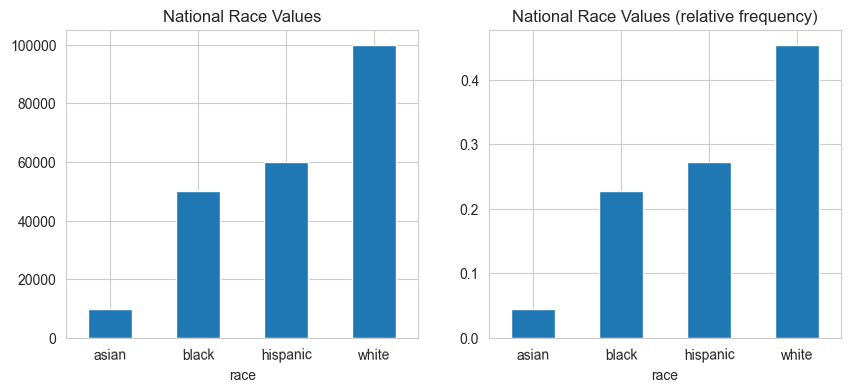

In [4]:
plt.figure(figsize = (10, 4))

plt.subplot(121)
national_race.groupby('race').size().plot(kind='bar', 
            rot=True, title='National Race Values');

plt.subplot(122)
(national_race.groupby('race').size() / len(national_race)).plot(kind='bar', 
            rot=True, title='National Race Values (relative frequency)');            

Let's create a town X with the following race composition:

In [5]:
town_X = pd.DataFrame({'race': ["white"]*60 + ["hispanic"]*30 + ["black"]*25 +["asian"]*8})
print(town_X.shape)
town_X.groupby('race').size()

(123, 1)


race
asian        8
black       25
hispanic    30
white       60
dtype: int64

Let's plot now both relative frequencies: national and from town_X

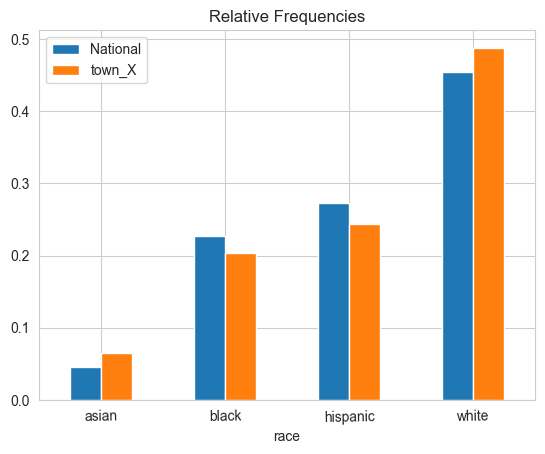

In [6]:
df_r = pd.DataFrame()
df_r['National'] = national_race.groupby('race').size() / len(national_race)
df_r['town_X'] = town_X.groupby('race').size() / len(town_X)

df_r.plot(kind='bar', rot=True, title='Relative Frequencies');

As you can see, the bars' heights are not quite different. Let's compute the chi-squared goodness of fit test.

In [7]:
stat, p = st.chisquare(f_obs=town_X.groupby('race').size()/len(town_X)*100,   # Array of observed counts
         f_exp=national_race.groupby('race').size()/len(national_race)*100)   # Array of expected counts
print('chisquare stat = %.3f, pvalue = %.4f' %(stat, p))               

chisquare stat = 1.646, pvalue = 0.6490


0.6490 > 0.05 There are not reasons to reject Ho.

It looks like there are no significant differences between national frequencies and the town_x frequencies.

Let's analyse town_Y

In [8]:
town_Y = pd.DataFrame({'race': ["white"]*300 + ["hispanic"]*30 + ["black"]*25 +["asian"]*8})
print(town_Y.shape)
town_Y.groupby('race').size()

(363, 1)


race
asian         8
black        25
hispanic     30
white       300
dtype: int64

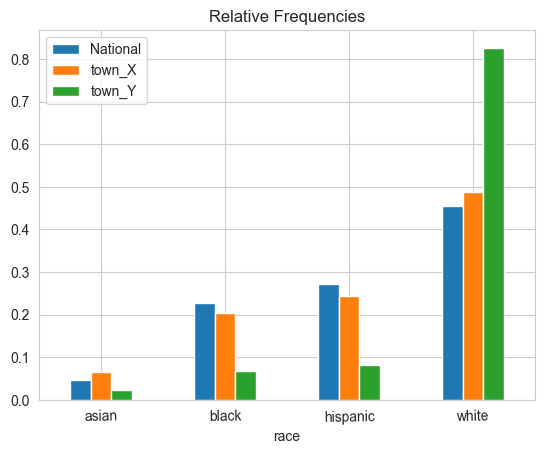

In [9]:
df_r['town_Y'] = town_Y.groupby('race').size() / len(town_Y)
df_r.plot(kind='bar', rot=True, title='Relative Frequencies');

It looks like town_Y does not follow the national race distribution. Let's prove it.

In [10]:
stat, p = st.chisquare(f_obs=town_Y.groupby('race').size()/len(town_Y)*100,    # Array of observed counts
         f_exp=national_race.groupby('race').size()/len(national_race)*100)    # Array of expected counts
print('chisquare stat = %.3f, pvalue = %.4f' %(stat, p))  

chisquare stat = 55.923, pvalue = 0.0000


`0.0000 < 0.05`  town_Y does not follow the national race distribution.

## Chi-Squared Test of Independence

Independence is a critical concept in Probability that describes a situation where knowing the value of one variable tells us nothing about the value of another.

The chi-squared test of independence tests whether two categorical variables are independent.

**Ho**: There are no relationships between the two categorical variables. If we know the value of one variable, it does not help us to predict the value of another one.

**Ha**: There are relationships between the categorical variables. Knowing the value of one variable does help us predict the value of another one.

In [11]:
# Sample data randomly at fixed probabilities
np.random.seed(10)
voter_race = np.random.choice(a= ["black","hispanic","white"],
                              p = [0.20 ,0.30, 0.5],
                              size=1000)
                              

In [12]:
# Sample data randomly at fixed probabilities
voter_party = np.random.choice(a= ["democrat","independent","republican"],
                              p = [0.4, 0.2, 0.4],
                              size=1000)

In [13]:
voters = pd.DataFrame({"race":voter_race, "party":voter_party})

voter_tab = pd.crosstab(voters.race, voters.party, margins = True)
voter_tab.columns = ["democrat","independent","republican","row_totals"]
voter_tab.index   = ["black", "hispanic", "white", "col_totals"]
voter_tab

,democrat,independent,republican,row_totals
black,86,32,96,214
hispanic,122,58,109,289
white,189,96,212,497
col_totals,397,186,417,1000


In [14]:
# Removing margins
observed = voter_tab.iloc[0:3,0:3]   # Get table without totals for later use
observed

,democrat,independent,republican
black,86,32,96
hispanic,122,58,109
white,189,96,212


In [15]:
stat, p, df, expm = st.chi2_contingency(observed= observed)
print('chisquare stat = %.3f, pvalue = %.4f' %(stat, p))  

chisquare stat = 4.547, pvalue = 0.3371


The output shows the chi-square statistic, the p-value, and the degrees of freedom followed by the expected counts.

Given the high p-value, the test result does not detect a significant relationship between the variables.

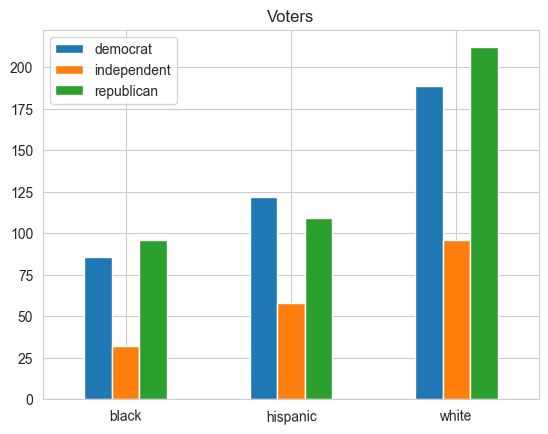

In [16]:
observed.plot(kind='bar', rot=True, title='Voters');

**Example**: The table describes the degrees earned by men and women in foreign languages in 1992.

In [17]:
table = pd.DataFrame({'Bachelos':[10,6], 'Masters':[20,9], 'Doctorate':[30,17]}, index=['Male','Female'])
table

,Bachelos,Masters,Doctorate
Male,10,20,30
Female,6,9,17


In [18]:
stat, p, dof, expected = st.chi2_contingency(table)
print('chisquare stat = %.3f, pvalue = %.4f' %(stat, p))  

chisquare stat = 0.272, pvalue = 0.8730


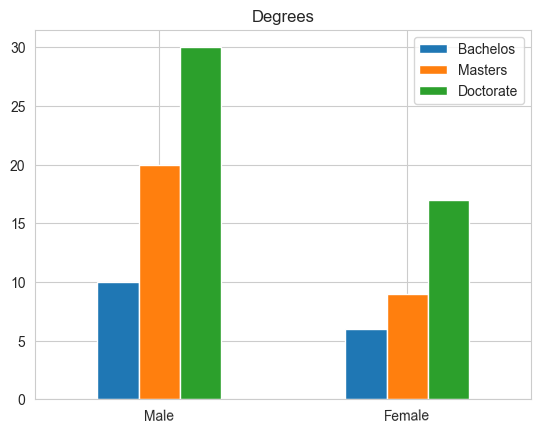

In [19]:
table.plot(kind='bar', rot=True, title='Degrees');

## One Sample Z test for Proportion

The one-sample proportion test estimates whether a sample's proportion significantly differs from the population proportion. It compares the sample proportion to a reference value or population proportion.

Let´s create a function for computing one sample test for proportion.

In [20]:
def one_sample_prop(sample, population_prop=0, alpha=0.05, alternative='two-sided'):
    '''
    Hipothesis Test for one proportion
    sample:          list with 1 (success) and 0 (failure)
    population_prop: poblational proportion
    alpha:           significance level
    alternative:     'two-sided', 'smaller', and 'larger'
    '''
    sigHa = {'two-sided':'!=', 'smaller':'< ', 'larger':'> '}
    print('--- One sample z-test for proportion ---')
    print('    Ho: prop = ', np.round(population_prop,2))
    print('    Ha: prop', sigHa[alternative], np.round(population_prop,2))
    print('Sample proportion = %.3f' %(np.mean(sample)))    
    z_stat, pval = sprop.proportions_ztest(np.sum(sample), len(sample), 
                                           value=population_prop, alternative=alternative)
    print('z-value = %.3f    p-value = %.4f' %(z_stat, pval))
    if pval < alpha:            
        print("%.4f <= %.2f We are rejecting the null hypothesis." %(pval, alpha))
    else:
        print("%.4f > %.2f We have no reasons for rejecting the null hypothesis." %(pval, alpha))

**student-mat.csv** dataset is related to student performance in math in two high schools in Portugal.

In [21]:
data = pd.read_csv('student-mat.csv',sep=';')
print(data.shape)
data.head()

(395, 33)


,school,sex,age,address,famsize,...,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,...,3,6,5,6,6
1,GP,F,17,U,GT3,...,3,4,5,5,6
2,GP,F,15,U,LE3,...,3,10,7,8,10
3,GP,F,15,U,GT3,...,5,2,15,14,15
4,GP,F,16,U,GT3,...,5,4,6,10,10


We want to know if the internet use for students is superior to 80%.

Let's analyze the values of the variable `internet`.

In [22]:
data.internet.unique()

array(['no', 'yes'], dtype=object)

Let's create a new variable: `internet` with `1` if `yes`, and `0` if `no`.

In [23]:
internet = [1 if data.internet[k]=='yes' else 0 for k in range(data.shape[0])]
one_sample_prop(internet, 0.8, alternative='larger')

--- One sample z-test for proportion ---
    Ho: prop =  0.8
    Ha: prop >  0.8
Sample proportion = 0.833
z-value = 1.753    p-value = 0.0398
0.0398 <= 0.05 We are rejecting the null hypothesis.


We reject the null hypothesis; therefore, the proportion of students with the internet is greater than 80%.

Is it greater than 90%?

In [24]:
one_sample_prop(internet, 0.9, alternative='larger')

--- One sample z-test for proportion ---
    Ho: prop =  0.9
    Ha: prop >  0.9
Sample proportion = 0.833
z-value = -3.574    p-value = 0.9998
0.9998 > 0.05 We have no reasons for rejecting the null hypothesis.


We do not reject Ho; therefore, the proportion of students with internet is not greater than 90%.

Is it equal to 85%

In [25]:
one_sample_prop(internet, 0.85)

--- One sample z-test for proportion ---
    Ho: prop =  0.85
    Ha: prop != 0.85
Sample proportion = 0.833
z-value = -0.910    p-value = 0.3626
0.3626 > 0.05 We have no reasons for rejecting the null hypothesis.


## One Sample Z test for the Mean

One sample z-test determines whether a particular population parameter, mostly the mean, is significantly different from an assumed value. The test is valid when the sample comes from a normal distribution. It is a parametric test.

We would use a `z-test` if:
- Our sample size is greater than 30. Otherwise, use a t-test.
- Data points should be independent of each other
- Our data is normally distributed.
- Our data should be randomly selected from a population where each item has an equal chance of being selected.

In [26]:
def one_sample_ztest(sample, population_value, alpha=0.05, alternative='two-sided'):    
    '''
    z-test for one mean
    sample:      list of values
    pop_value:   poblational mean
    alpha:       significance level
    alternative: one of the three values: 'two-sided', 'smaller', and 'larger'    
    '''
    sigHa = {'two-sided':'!=', 'smaller':'< ', 'larger':'> '}
    print('--- One sample z-test ---')
    print('    Ho: mean = ', np.round(population_value,2))
    print('    Ha: mean', sigHa[alternative], np.round(population_value,2))    
    print('Sample Mean = %.2f' %(np.mean(sample)))
    z_stat, pval = stests.ztest(x1=sample, value=population_value, alternative=alternative)
    print('z-value = %.3f    p-value = %.4f' %(z_stat, pval))
    if pval < alpha:    
        print("%.4f <= %.2f We are rejecting the null hypothesis." %(pval, alpha))
    else:
        print("%.4f > %.2f We have no reasons for rejecting the null hypothesis." %(pval, alpha))

Let's generate fictitious students' heights and work with them.

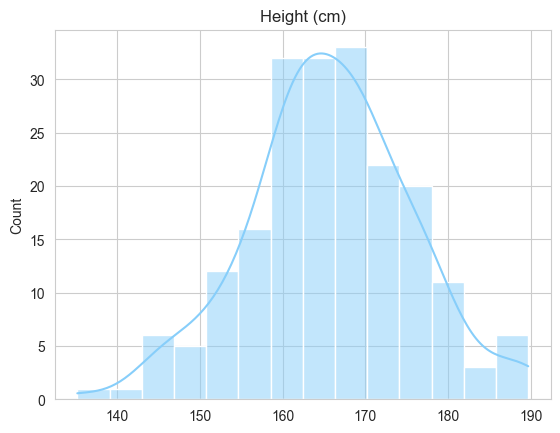

In [27]:
# Generating data
np.random.seed(10)
height = np.random.normal(165, 10, 200)
sns.histplot(x=height, color='lightskyblue', kde=True).set(title='Height (cm)');

In [28]:
# Determining whether the students' heights h2 is 170 on average
one_sample_ztest(height, 170, alternative='two-sided')

--- One sample z-test ---
    Ho: mean =  170
    Ha: mean != 170
Sample Mean = 165.74
z-value = -6.151    p-value = 0.0000
0.0000 <= 0.05 We are rejecting the null hypothesis.


The average student's height is not 170.

Let us determine whether h2 is lesser than 170.

In [29]:
one_sample_ztest(height, 170, alternative='smaller')

--- One sample z-test ---
    Ho: mean =  170
    Ha: mean <  170
Sample Mean = 165.74
z-value = -6.151    p-value = 0.0000
0.0000 <= 0.05 We are rejecting the null hypothesis.


We reject the null hypothesis; therefore, the average student's height is lesser than 170.

## One Sample t-test for the Mean

The one-sample t-test determines whether the sample mean is statistically different from a known or hypothesized population mean. The test is valid when the sample comes from a normal distribution. It is a parametric test.

We usually use the t-test when our sample size is less than 30, but that is not a hard rule.

Suppose we have 20 student heights, and we are checking whether the average height is 170 cm or not.

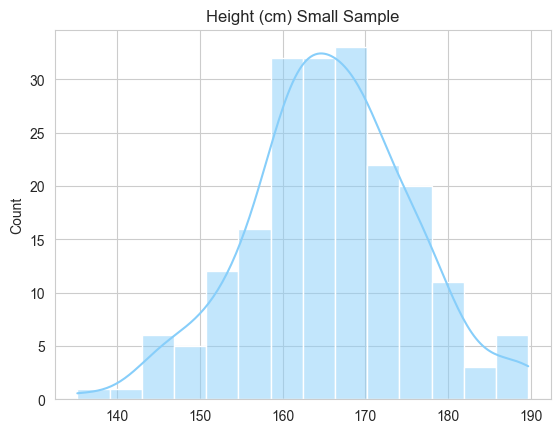

In [30]:
# Generating data
np.random.seed(0)
height2 = np.random.normal(169, 5, 20)
sns.histplot(x=height, color='lightskyblue', kde=True).set(title='Height (cm) Small Sample');

We want to know whether the mean student's height is 170.

In [31]:
def one_sample_ttest(sample, population_value, alpha=0.05, alternative='two-sided'):
    '''
    t-Test for one mean
    sample:      list of values
    pop_value:   poblational mean
    alpha:       significance level
    alternative: one of the three values: 'two-sided', 'smaller', and 'larger'
    '''
    sigHa = {'two-sided':'!=', 'smaller':'< ', 'larger':'> '}
    print('--- One sample t-test ---')
    print('    Ho: mean = ', np.round(population_value,2))
    print('    Ha: mean', sigHa[alternative], np.round(population_value,2))    
    print('Sample Mean = %.2f' %(np.mean(sample)))
    alt={'two-sided':'two-sided','smaller':'less','larger':'greater'}
    t_stat, pval = st.ttest_1samp(sample, population_value, alternative=alt[alternative])
    print('t-value = %.3f    p-value = %.4f' %(t_stat, pval))
    if pval < alpha:    
        print("%.4f <= %.2f We are rejecting the null hypothesis." %(pval, alpha))
    else:
        print("%.4f > %.2f We have no reasons for rejecting the null hypothesis." %(pval, alpha))

In [32]:
one_sample_ttest(height2, 170)

--- One sample t-test ---
    Ho: mean =  170
    Ha: mean != 170
Sample Mean = 171.85
t-value = 1.894    p-value = 0.0736
0.0736 > 0.05 We have no reasons for rejecting the null hypothesis.


## References

- Dekking, F.M. et.al. (2005) A Modern Introduction to Probability and Statistics, USA: Springer
- Good, P. (2005) Permutation, Parametric, and Bootstrap Tests of Hypothesis, Third Edition, USA: Springer Series in Statistics